<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_VS_KNN%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형회귀 vs KNN회귀
- 선형회귀함수 그래프는 직선의 방정식  
  y = wx + b  
  y: 종속변수, w:가중치, x:독립변수, b:편향  

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import KNeightborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [15]:
import numpy as np
n=1000
heights = np.random.normal(174,8,n)

In [67]:
heights2 = [height//0.5 for height in heights] #표준편차 조정

import pandas as pd
se = pd.Series(heights2)
svc = se.value_counts()

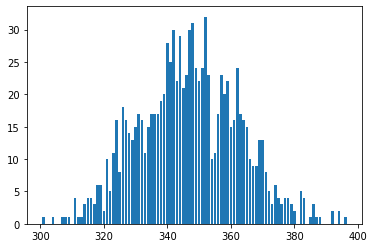

In [68]:
import matplotlib.pyplot as plt
plt.bar(svc.index,svc.values)
plt.show()

In [ ]:
bmi = np.random.normal(21,1,n)
weights = bmi*(heights**2)/10000 #bmi 지수 생성, bmi = w/(txt),t단위는 m
weights

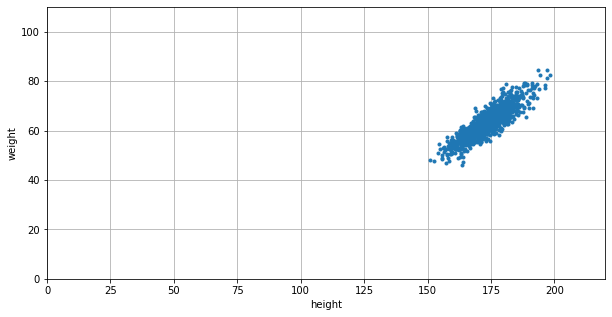

In [70]:
plt.figure(figsize=(10,5))
plt.plot(heights,weights,'.')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0,220)
plt.ylim(0,110)
plt.grid(True)
plt.show()

In [31]:
#xs = [ [weight] for weight in weights ]
xs = weights.reshape(-1,1) #독립변수는 여러 개의 특성으로 구성할 수 있으므로 ML모델에서는 2차원 배열 형태로 학습 데이터를 입력 받음
xs.shape

(1000, 1)

In [81]:
xs2 = xs.reshape(5,20,-1)
xs2.shape

(5, 20, 10)

In [83]:
#xs3 = xs.reshape(3,20,-1) #해당 구조는 딱 나누어 떨어지지 않으므로 만들 수 없는 것 = tensor data
#xs3.shape

In [32]:
ys = heights #종속변수는 한 개이며 ML모델에서 1차원 배열 형태로 학습 데이터를 입력 받음
ys.shape

(1000,)

In [71]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() #모델 개체 생성
lr_model.fit(xs,ys) #학습
lr_model.coef_, lr_model.intercept_ #가중치, 편항

(array([1.05678151]), 106.52760131569929)

In [72]:
txs = np.array([[50],[60],[67],[70],[94]]) #몸무게가 67,70,94일 때

In [73]:
pred_val1 = lr_model.predict(txs) #키를 예측하시오
pred_val1

array([159.36667661, 169.93449167, 177.33196221, 180.50230673,
       205.86506287])

In [74]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(xs,ys,train_size=0.8) #기존 값을 무작위로 섞어서 train, test 셋을 원하는 비율로 나눈다
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((800, 1), (200, 1), (800,), (200,))

In [75]:
lr_model = LinearRegression()
lr_model.fit(xs,ys) #학습
train_score = lr_model.score(train_xs, train_ys) #평가
test_score = lr_model.score(test_xs, test_ys) #평가
train_score, test_score

(0.769400800401861, 0.7731258370251197)

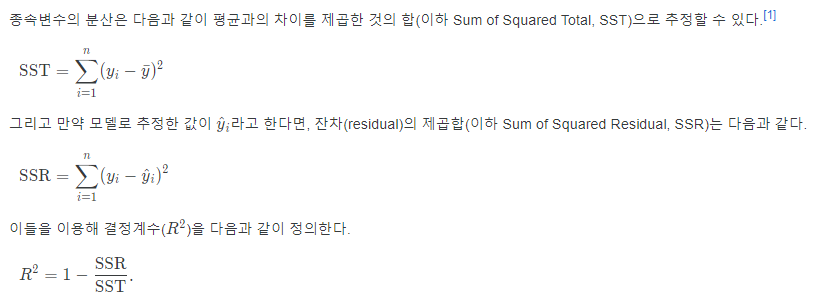

In [76]:
lr_model = LinearRegression()
lr_model.fit(xs,ys) #학습
train_score = lr_model.score(train_xs, train_ys) #평가
test_score = lr_model.score(test_xs, test_ys) #평가
train_score, test_score

(0.769400800401861, 0.7731258370251197)

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor() #모델 개체 생성
knr_model.fit(xs,ys) #학습
pred_val2 = knr_model.predict(txs) #ㅇㅖ측
pred_val2

array([160.87336939, 168.76372406, 177.33771218, 181.09198031,
       196.36754317])

In [78]:
knr_model = KNeighborsRegressor()
knr_model.fit(xs,ys) #학습
train_score = knr_model.score(train_xs, train_ys) #평가
test_score = knr_model.score(test_xs, test_ys) #평가
train_score, test_score

(0.8266362673821898, 0.8000598244782088)

In [79]:
pred_val1 = lr_model.predict(txs)
pred_val1

array([159.36667661, 169.93449167, 177.33196221, 180.50230673,
       205.86506287])

#KNN에서 주의할 점

In [80]:
pv1 = lr_model.predict([[35],[82],[95],[90],[100],[108],[120],[130]]) #선형은 해당 몸무게의 키를 예측 (몸무게가 커질수록 키도 커진다)
pv2 = knr_model.predict([[35],[82],[95],[90],[100],[108],[120],[130]]) #KNN은 인접한 값으로 추측하다 보니 우리가 가지고 있는 값을 벗어난 몸무게부터는 키 예측값이 고정됨
pv1, pv2

(array([143.51495402, 193.1836848 , 206.92184438, 201.63793685,
        212.20575191, 220.66000396, 233.34138203, 243.90919709]),
 array([157.02531772, 189.6676871 , 196.36754317, 196.36754317,
        196.36754317, 196.36754317, 196.36754317, 196.36754317]))

In [58]:
weights.max() #이 이상의 몸무게에 대해서 예측값을 평균값밖에 주지 못함

88.225745131736

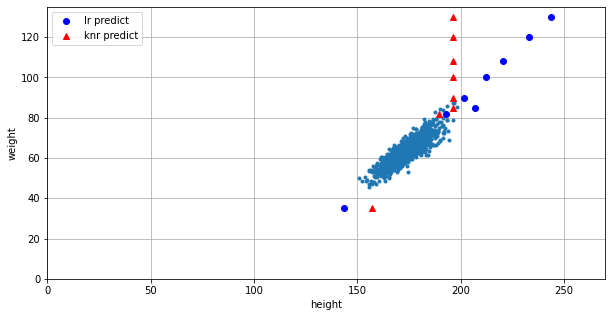

In [66]:
plt.figure(figsize=(10,5))
plt.plot(heights,weights,'.')
plt.plot([143.51, 193.18 , 206.92, 201.63, 212.20, 220.66, 233.34, 243.90],[35,82,85,90,100,108,120,130],'bo',label='lr predict')
plt.plot([157.02, 189.66 , 196.36, 196.36, 196.36, 196.36, 196.36, 196.36],[35,82,85,90,100,108,120,130],'r^',label='knr predict')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0,270)
plt.ylim(0,135)
plt.grid(True)
plt.legend()
plt.show()

#회귀 VS 분류
- 회귀 : 키가 174cm, 허리둘레 38인치, 성별 남 인 사람이 있다. 몸무게는 얼마 일까?  
- 분류 : 꽃받침 길이: 2.4cm, 너비: 3.5cm, 꽃잎 길이: 6.5cm, 너비: 3.1cm  인 iris는 어떤 품종일까?

#지도 학습 VS 비지도 학습

#KMeans